# Re-moyennage

In [7]:
%reset -f

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Découper un échantillon


Ecrivons une fonction `make_batch(data,batch_size)` qui découpe un vecteur de données `data` en parquets de taille `batch_size`, et dispose tous ces paquets comme les lignes d'une matrice.

Par exemple si

    data = [3,4,5,6,7,8,9]

alors `make_batch(data,3)` renverais une matrice de deux lignes de taille 3:

        3,4,5
        6,7,8

et le 9 final serait mis à la poubel.

### → ♡♡♡

In [12]:
def make_batch(data,batch_size): ...


In [ ]:
def test():
    data = [3,4,5,6,7,8,9]
    res=make_batch(data,3)
    print(res)
test()

    [[3 4 5]
    [6 7 8]]

## Moyenne de moyenne

Nous disposons d'un gros paquets de données `data` qui est un échantillon d'une v.a. $X_0$. Si je veux estimer $\mathbf E[X_0]$ je calcule simplement `np.mean(data)`.

Mais que se passe-t-il quand je procède ainsi:
1.  Je découpe mes data en paquets de tailles égales.
2.  Je moyenne chaque paquet
3.  Je fais la moyenne des moyennes ainsi optenues?

Oberservons:

In [ ]:
#génération d'un échantillon
data=np.random.exponential(scale=32,size=10_000)

In [14]:
#moyen calculèe d'un seul coup
mean=np.mean(data)
mean

In [15]:
#on fait des paquets
data_by_batch=make_batch(data,300)
#on moyenne chaque paquet
batch_means=np.mean(data_by_batch,axis=1)
print(batch_means)

In [16]:
#on moyenne les moyennes
np.mean(data_by_batch)

Expliquons pourquoi ces deux techniques donnent exactement le même résultat.

### → ♡♡

Notons
* $D_{ij}$ la matrice `data_by_batch`
* $bs$=`batch_size`
* $k$ le nombre de batch.
* $n$=`len(data)` le nombre de données au total.
* $m_i$ la moyenne du $i$-ème batch
$$
m_i = \color{red}{\square \square \square} \sum_j D_{ij}
$$
Donc la moyenne des moyennes est données par
$$
m = \color{red}{\square \square \square} \sum_i m_i
$$
Mais dans le programme précédent, on est dans la situation où $bs$ <font color="red"> □ □ □ </font>, ce qui implique que $n=k*bs$. Par conséquent:
$$
m = {1 \over k}{1 \over  {bs}} \sum_i \sum_j D_{ij} = {1\over n} \sum_{i,j} D_{ij}
$$
ce qui revient à faire la moyenne d'un seul coup de toutes les données.

## Intervalles de confiance



Nous venons de voir que quelque soit la manière de moyenner les données, on trouve le même résultat (ouf). Mais qu'en est-il des intervalles de confiance ?



Rappelons que nos `data` ont été découpées en $k$ paquets.  Notons $m_0,...,m_{k-1}$ les moyennes des parquets.

Notons $M^{(k)}$ la moyenne des moyennes $m_0,...,m_{k-1}$.  
Notons   $I^{(k)}$ l'intervalle de confiance lié à ce calcul.


Est-ce que $I^{(k)}$ varie beaucoup quand on change de nombre de paquet. Si la réponse est oui, ça serait très embêtant ne trouvez-vous pas ? Il faut tester.  





Voici le résultat de mes test:

* En abscisse c'est la taille des parquets $k$.
* Le point rouge c'est la moyenne des moyenne (elle varie très légèrement car $k$ ne divise pas toujours $n$.
* Le trait noir représente l'intervalle de confiance.



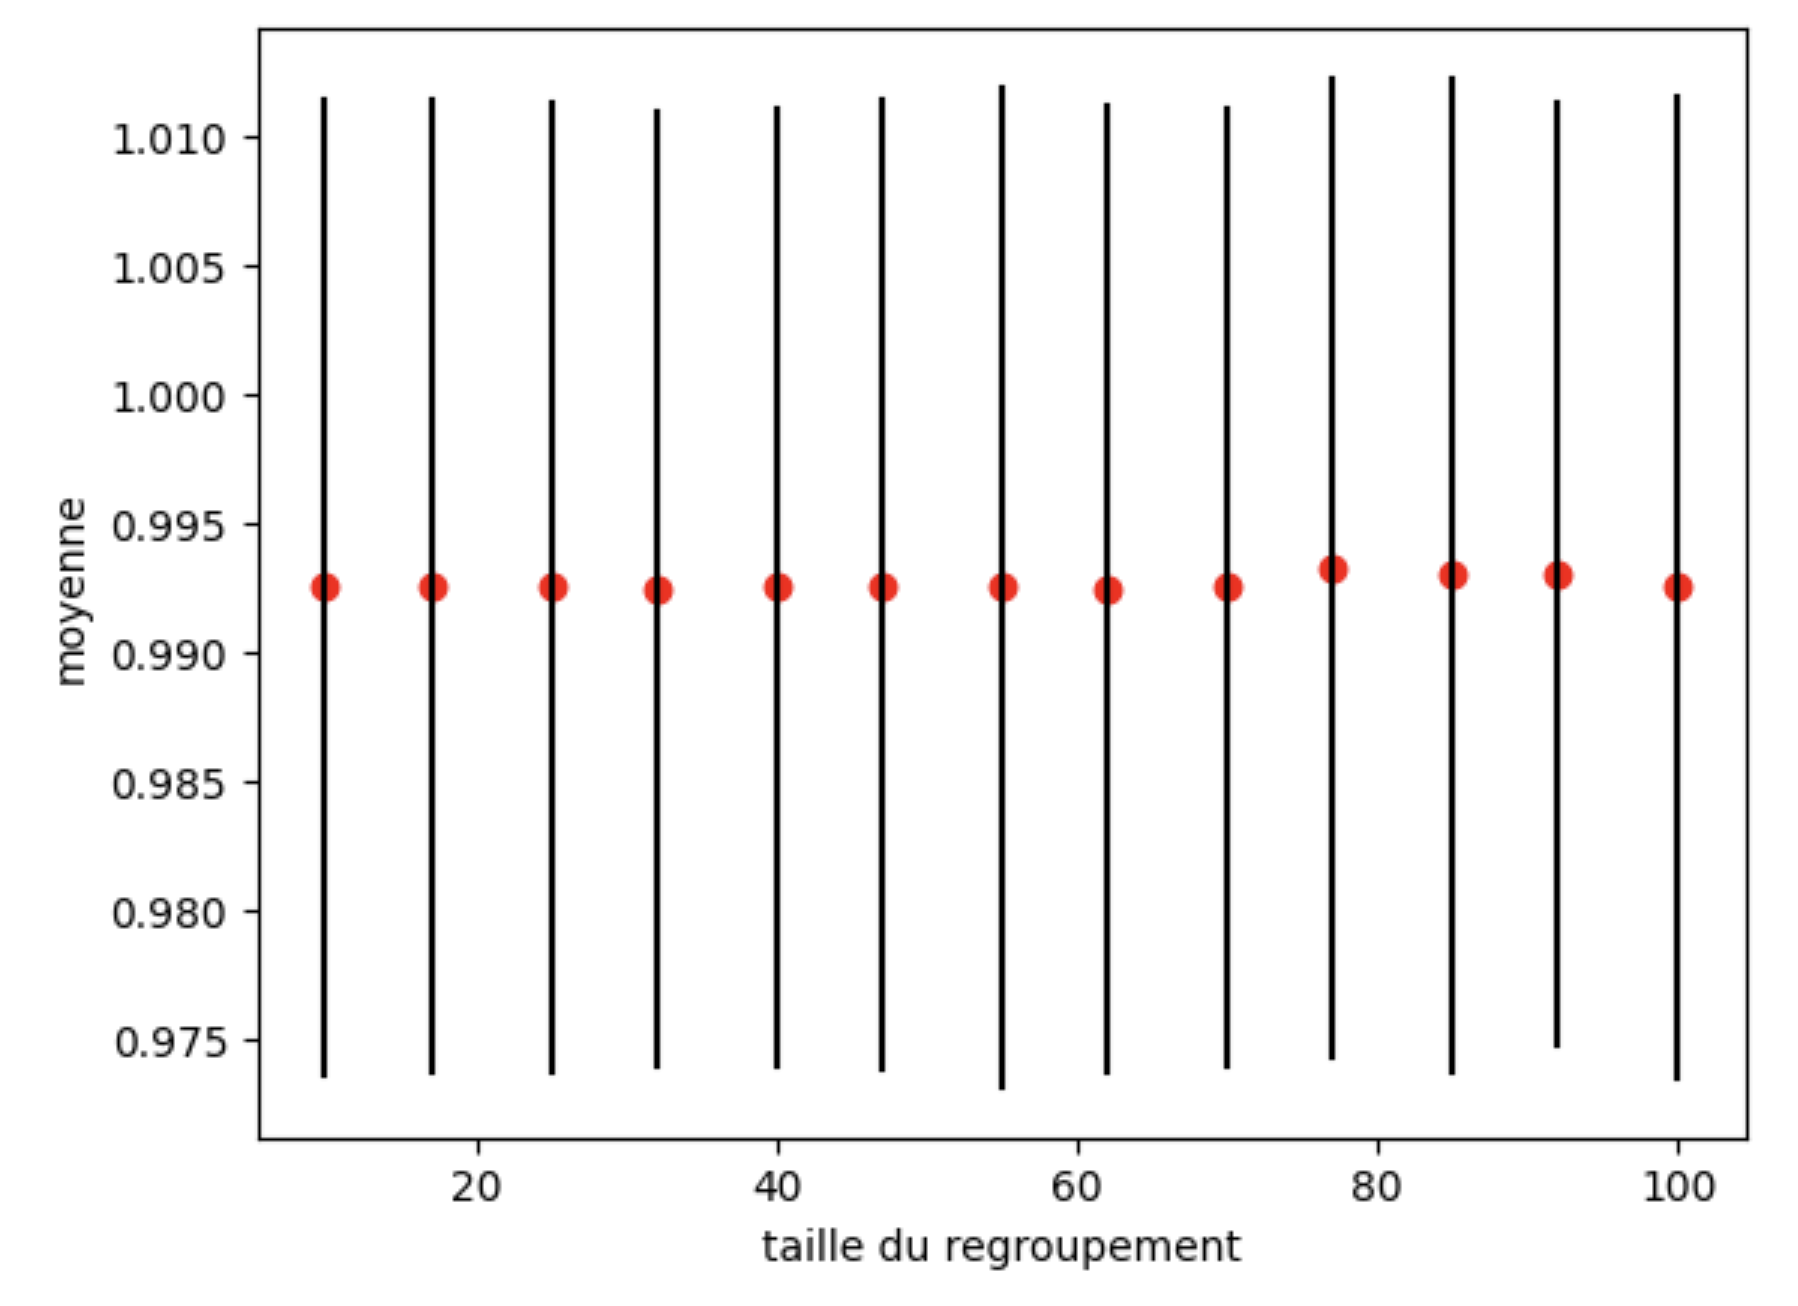

OUF, les intervalles de confiance sont approximativement similaire.

## Détail du programme



La fonction suivante permet de calculer la demi-largeur d'un intervalle de confiance d'une moyenne.


    



#### → ♡♡

In [20]:
def confidence_epsilon(data,alpha):
    #l'estimateur de l'écart-type:
    sigma_hat=
    n=len(data)
    quantil=stats.norm.ppf(1-alpha/2)
    return sigma_hat*quantil/...

def test():
    np.random.seed(123)
    data=np.random.rand(100)
    demi_interval=confidence_epsilon(data,0.05)
    print(demi_interval)
test()

    0.04809376849603424

#### → ♡

Mais quand la taille de l'échantillon est petite, le quantile:

    quantil=stats.norm.ppf(1-alpha/2)

doit être remplacer par:




#### →♡♡

In [23]:
alpha=0.05
for bs in np.linspace(10,100,13):
    bs=int(bs)
    data_reshaped=make_batch(data,bs)

    means=np.mean(data_reshaped...
    mean=np.mean(means)
    epsilon=confidence_epsilon(...

    plt.plot(bs,mean,"ro",label="mean")
    plt.plot([bs,bs],[mean-epsilon,mean+epsilon],"k")
    plt.xlabel("taille du regroupement")
    plt.ylabel("moyenne")

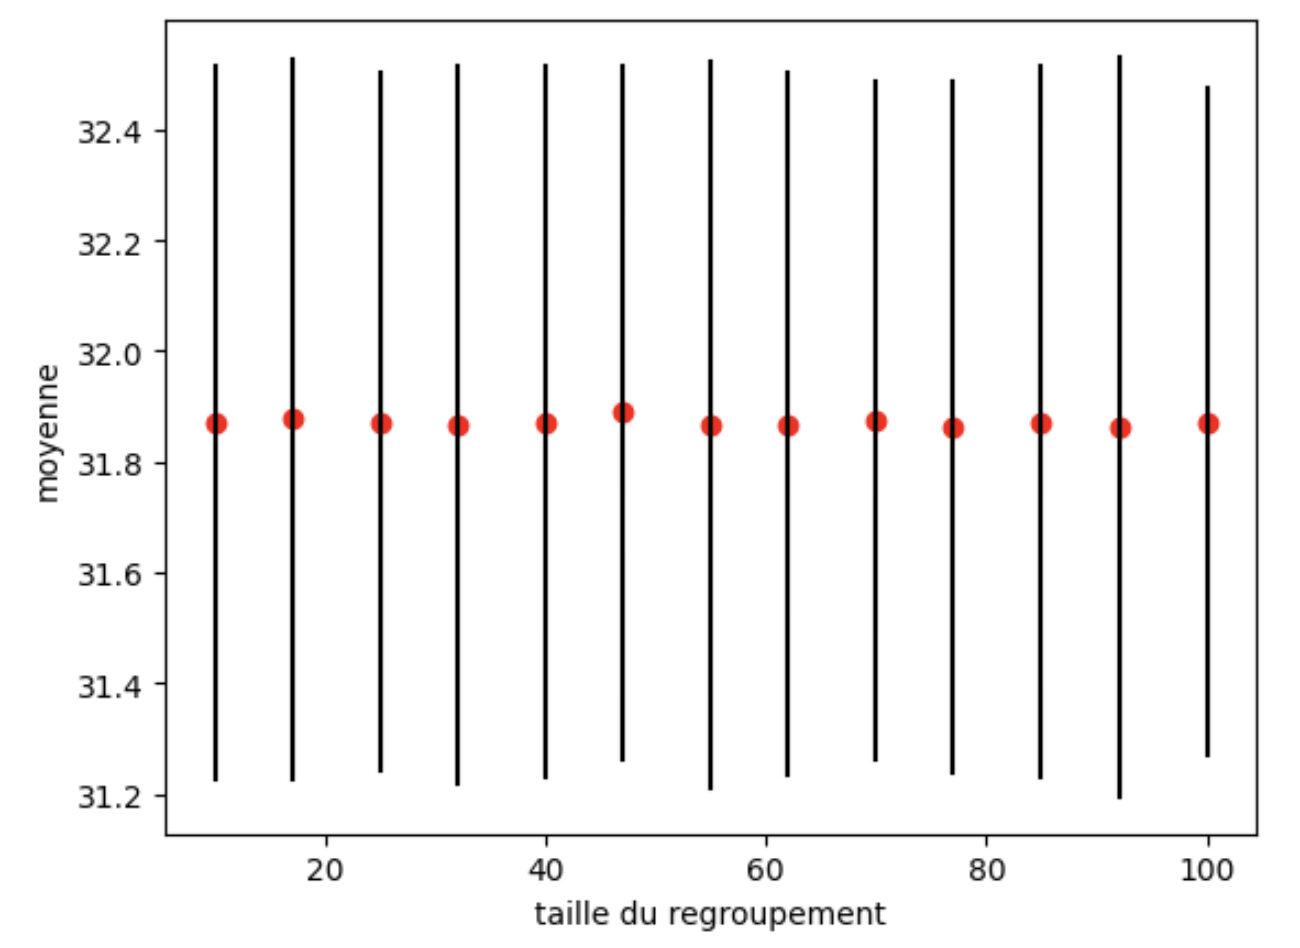